<a href="https://colab.research.google.com/github/WangRC03/Data_Management_Assignment1/blob/main/U_S__Retail_and_Food_Services_Sales_Analysis(2023%E2%80%932025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Retail and Food Services Sales Analysis**  
**Author: WANG RONGCHENG**

This notebook presents a comprehensive analysis of monthly U.S. retail and food services sales data for the years **2023 and 2024**.Using open-source data from the **U.S. Census Bureau**,the objective of this analysis is to:

- Uncover short- and long-term sales trends,  
- Compare year-over-year and month-over-month performance,  
- Analyze sub-industry segments (excluding volatile components),  
- Forecast retail sales for 2025 using time series modeling  
- Provide insights to support data-driven decision-making in the retail sector.

The analysis incorporates data preprocessing,exploratory data visualization,trend interpretation,forecasting,and practical business recommendations—all delivered in a reproducible Python environment.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Data Loading and Structure Overview

### Load Excel fil

In [35]:
xls=pd.ExcelFile('/content/sample_data/mrtssales92-present25.xlsx')

### Load sheets

In [36]:
df_2024=xls.parse('2024',skiprows=4).dropna(how='all').dropna(axis=1,how='all')
df_2023=xls.parse('2023',skiprows=4).dropna(how='all').dropna(axis=1,how='all')

### Preview structure

In [37]:
display(df_2024.head(10))

,Unnamed: 0,Unnamed: 1,Jan. 2024,Feb. 2024,Mar. 2024,Apr. 2024,May. 2024,Jun. 2024,Jul. 2024,Aug. 2024,Sep. 2024,Oct. 2024,Nov. 2024,Dec. 2024,TOTAL
0,NaN,NOT ADJUSTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Retail and food services sales, total",637342,644825,707637,700302,744554,701555,726098,733560,683558,730720,736461,801294,8547906.0
2,NaN,Retail sales and food services excl motor vehi...,519395,518529,567110,561592,599690,570931,585742,590123,555090,592932,602249,661017,6924400.0
3,NaN,Retail sales and food services excl gasoline s...,590937,597462,654589,645366,686946,646232,668631,676701,632095,676690,687273,752889,7915811.0
4,NaN,Retail sales and food services excl motor vehi...,472990,471166,514062,506656,542082,515608,528275,533264,503627,538902,553061,612612,6292305.0
5,NaN,"Retail sales, total",552441,555528,609462,605419,643843,604360,629309,633664,589777,633013,641949,703832,7402597.0
6,NaN,"Retail sales, total (excl. motor vehicle and p...",434494,429232,468935,466709,498979,473736,488953,490227,461309,495225,507737,563555,5779091.0
7,NaN,GAFO(1),111547,115707,129000,121802,134944,129215,129958,137230,123313,131388,144400,172895,1581399.0
8,441,Motor vehicle and parts dealers,117947,126296,140527,138710,144864,130624,140356,143437,128468,137788,134212,140277,1623506.0
9,"4411,4412",Automobile and other motor vehicle dealers,107366,115944,128903,126921,132656,118881,128325,131084,117141,125638,122931,129378,1485168.0


In [39]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  98 non-null     object 
 1   Unnamed: 1  105 non-null    object 
 2   Jan. 2024   103 non-null    object 
 3   Feb. 2024   103 non-null    object 
 4   Mar. 2024   103 non-null    object 
 5   Apr. 2024   103 non-null    object 
 6   May. 2024   103 non-null    object 
 7   Jun. 2024   103 non-null    object 
 8   Jul. 2024   103 non-null    object 
 9   Aug. 2024   103 non-null    object 
 10  Sep. 2024   103 non-null    object 
 11  Oct. 2024   103 non-null    object 
 12  Nov. 2024   103 non-null    object 
 13  Dec. 2024   103 non-null    object 
 14  TOTAL       58 non-null     float64
dtypes: float64(1), object(14)
memory usage: 13.5+ KB



## Data Cleaning

Before the analysis,the data needed cleanup.Here’s what was done:

1. **Skipped Extra Rows**  
   The raw Excel file had extra rows.These were removed to keep only the monthly data.

2. **Removed Empty Values**  
   Some rows and columns were completely blank.These were dropped.

3. **Reset the Index**  
   After cleaning, the index was reset so rows were numbered correctly.

4. **Checked Column Names**  
   The second column contained category labels like "Retail and food services sales, total".These were used as group names.

This step helped turn the raw file into a clean,ready-to-use dataset.


### Define categories and months

In [40]:
categories_of_interest=[
    'Retail and food services sales, total',
    'Motor vehicle and parts dealers',
    'Gasoline stations',
    'Food and beverage stores',
    'Nonstore retailers']

months_2024=[f'{m}. 2024' for m in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
months_2023=[m.replace('2024','2023') for m in months_2024]

### Data cleaning

In [41]:
data_cleaned={}
for label in categories_of_interest:
    row_2024=df_2024[df_2024['Unnamed: 1']==label].iloc[0]
    row_2023=df_2023[df_2023['Unnamed: 1']==label].iloc[0]
    data_cleaned[label]={
        "2024":row_2024[months_2024].astype(float).values,
        "2023":row_2023[months_2023].astype(float).values,}

### Creating DataFrame

In [42]:
df_main=pd.DataFrame({
    'Month':months_2024,
    'Sales_2024':data_cleaned['Retail and food services sales, total']["2024"],
    'Sales_2023':data_cleaned['Retail and food services sales, total']["2023"]})

### Calculate year-on-year (YoY) and month-on-month (MoM) growth

In [43]:
df_main['YoY_Growth(%)']=((df_main['Sales_2024']-df_main['Sales_2023'])/df_main['Sales_2023'])*100
df_main['MoM_Growth(%)']=df_main['Sales_2024'].pct_change()*100
df_main

,Month,Sales_2024,Sales_2023,YoY_Growth(%),MoM_Growth(%)
0,Jan. 2024,637342.0,627609.0,1.550806,NaN
1,Feb. 2024,644825.0,606884.0,6.251771,1.174095
2,Mar. 2024,707637.0,692701.0,2.156197,9.740937
3,Apr. 2024,700302.0,674516.0,3.822889,-1.036548
4,May. 2024,744554.0,722019.0,3.121109,6.318988
5,Jun. 2024,701555.0,702231.0,-0.096265,-5.775135
6,Jul. 2024,726098.0,696200.0,4.294456,3.498371
7,Aug. 2024,733560.0,718533.0,2.091344,1.027685
8,Sep. 2024,683558.0,681679.0,0.275643,-6.816348
9,Oct. 2024,730720.0,697816.0,4.715283,6.899488



## Interpretation of the Visualization

This line chart compares monthly retail sales in 2023 and 2024.

- **January to April**:2024 beat 2023 in all months.This shows stronger demand or rising prices.
- **May to August**:Sales stayed high in 2024.Demand was consistent.
- **Overall Trend**:Patterns stayed the same year-to-year.But 2024 had slightly higher values.

This information is useful for planning inventory and promotions, especially in Q1 and Q4.


### Extract total sales rows for 2023 and 2024

In [45]:
row_2023=df_2023.iloc[1,2:14].astype(float)
row_2024=df_2024.iloc[1,2:14].astype(float)

### Define months

In [46]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

### Plotting

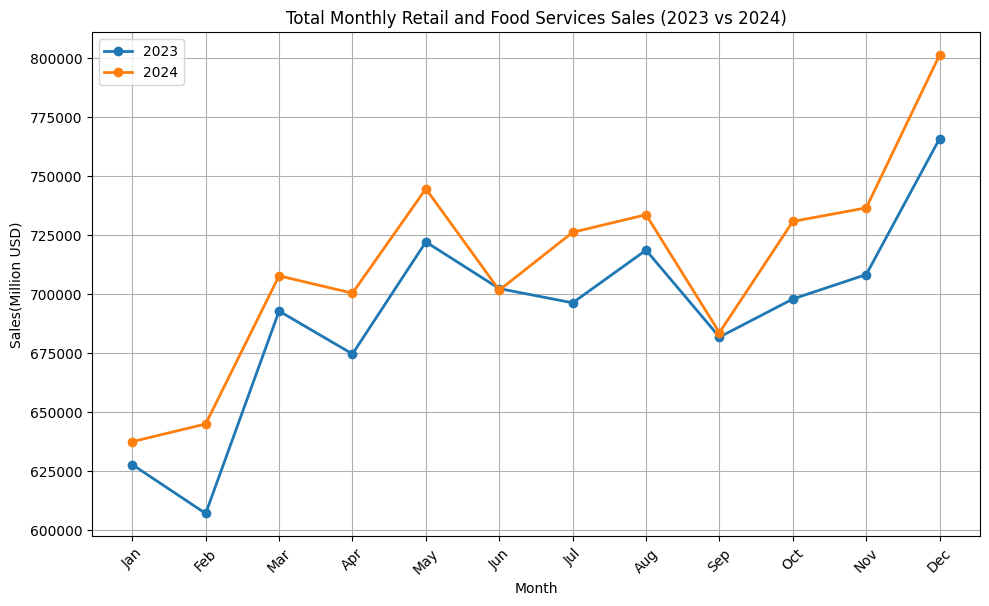

In [47]:
plt.figure(figsize=(10,6))
plt.plot(months,row_2023.values,marker='o',label='2023',linewidth=2)
plt.plot(months,row_2024.values,marker='o',label='2024',linewidth=2)
plt.title('Total Monthly Retail and Food Services Sales (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Sales(Million USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## Year-over-Year (YoY) and Month-over-Month (MoM) Growth

### YoY Growth (2024 vs 2023)

- February had the highest YoY growth,above 6%.
- Every month except June had positive growth.
- The last quarter of 2024 showed strong gains during the holiday season.

### MoM Growth (2024)

- March and December had big jumps in MoM growth.
- June and September saw drops, likely due to seasonal changes.
- The changes help spot monthly buying patterns.

#### Takeaways

- YoY helps see long-term changes.MoM shows short-term shifts.
- Retailers can plan promotions during slower months.
- This view helps combine strategy with timing.

<ipython-input-48-6e131940f094>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_main,x='Month',y='YoY_Growth(%)',ax=axes[0],palette='Blues_d')
<ipython-input-48-6e131940f094>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_main,x='Month',y='MoM_Growth(%)',ax=axes[1],palette='Oranges_d')
<ipython-input-48-6e131940f094>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
<ipython-input-48-6e131940f094>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_

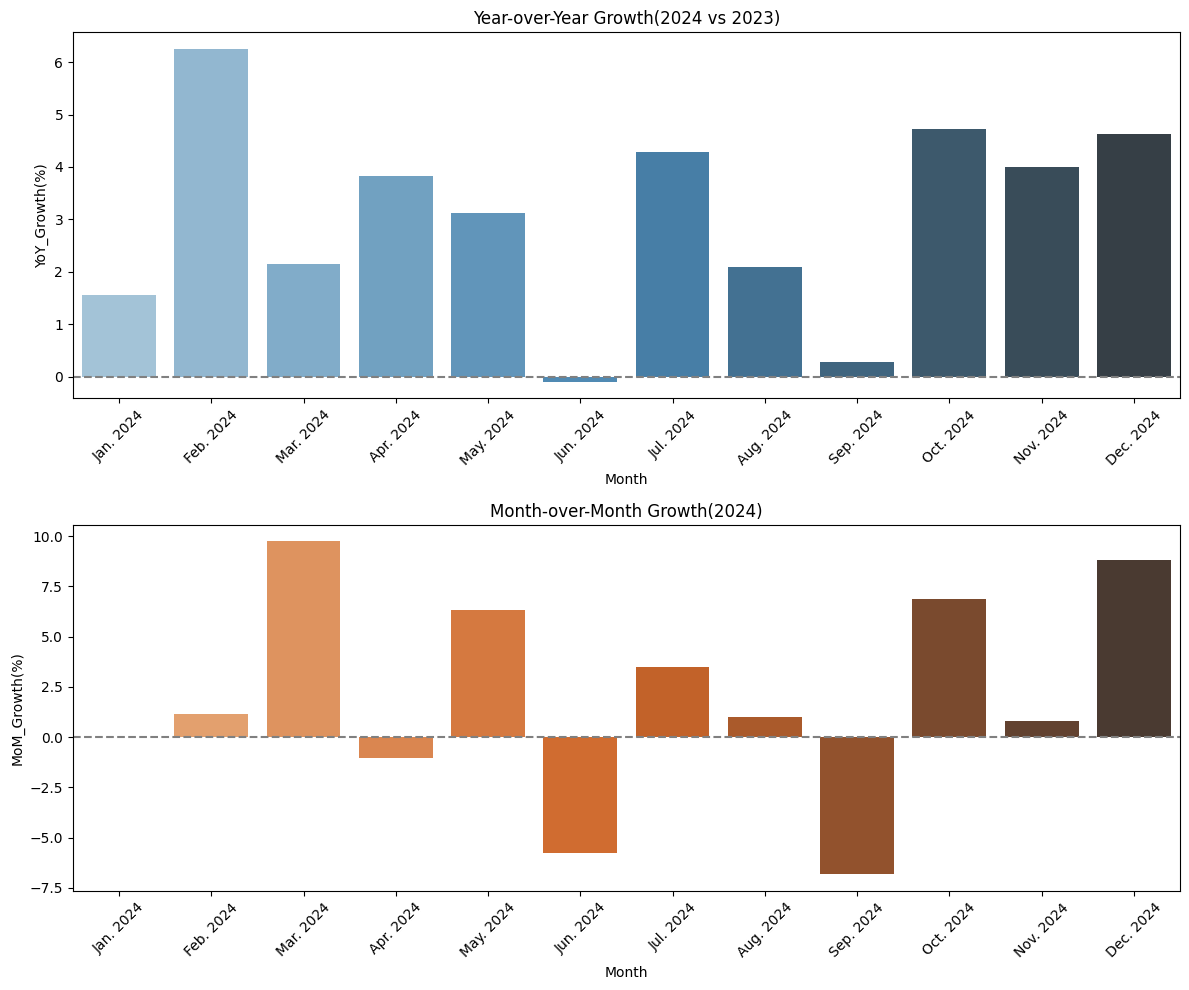

In [48]:
fig,axes=plt.subplots(2,1,figsize=(12,10))

sns.barplot(data=df_main,x='Month',y='YoY_Growth(%)',ax=axes[0],palette='Blues_d')
axes[0].set_title('Year-over-Year Growth(2024 vs 2023)')
axes[0].axhline(0,color='gray',linestyle='--')

sns.barplot(data=df_main,x='Month',y='MoM_Growth(%)',ax=axes[1],palette='Oranges_d')
axes[1].set_title('Month-over-Month Growth(2024)')
axes[1].axhline(0,color='gray',linestyle='--')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.tight_layout()
plt.show()


## Interpretation of Sub-Industry Trends

This chart compares retail sales without motor vehicles and gasoline.

- **Excluding Motor Vehicles**:Sales in 2024 were higher than 2023.This shows stable growth in core sectors.
- **Excluding Gasoline**:Retail still grew. Shoppers kept spending even with fuel removed.
- **Stable Patterns** Both years followed similar trends. Seasonality was strong,with small inflation or demand-based increases.

This view helps focus on essential retail categories,not volatile ones.


### Retail Sales Excluding Key Segments (2023 vs 2024)
### Define relevant categories for comparison

In [49]:
categories = {
    "Total":1,
    "Excl Motor Vehicles":2,
    "Excl Gasoline":3,
    "Excl Motor Vehicles & Gasoline":4}

### Create comparison DataFrame

In [50]:
comparison_df=pd.DataFrame({
    "Month":months,
    "2023_Total":df_2023.iloc[categories["Total"],2:14].astype(float).values,
    "2024_Total":df_2024.iloc[categories["Total"],2:14].astype(float).values,
    "2023_Excl_MV":df_2023.iloc[categories["Excl Motor Vehicles"],2:14].astype(float).values,
    "2024_Excl_MV":df_2024.iloc[categories["Excl Motor Vehicles"],2:14].astype(float).values,
    "2023_Excl_Gas":df_2023.iloc[categories["Excl Gasoline"],2:14].astype(float).values,
    "2024_Excl_Gas":df_2024.iloc[categories["Excl Gasoline"],2:14].astype(float).values,})

### Plot the comparison of sales excluding motor vehicles and gasoline

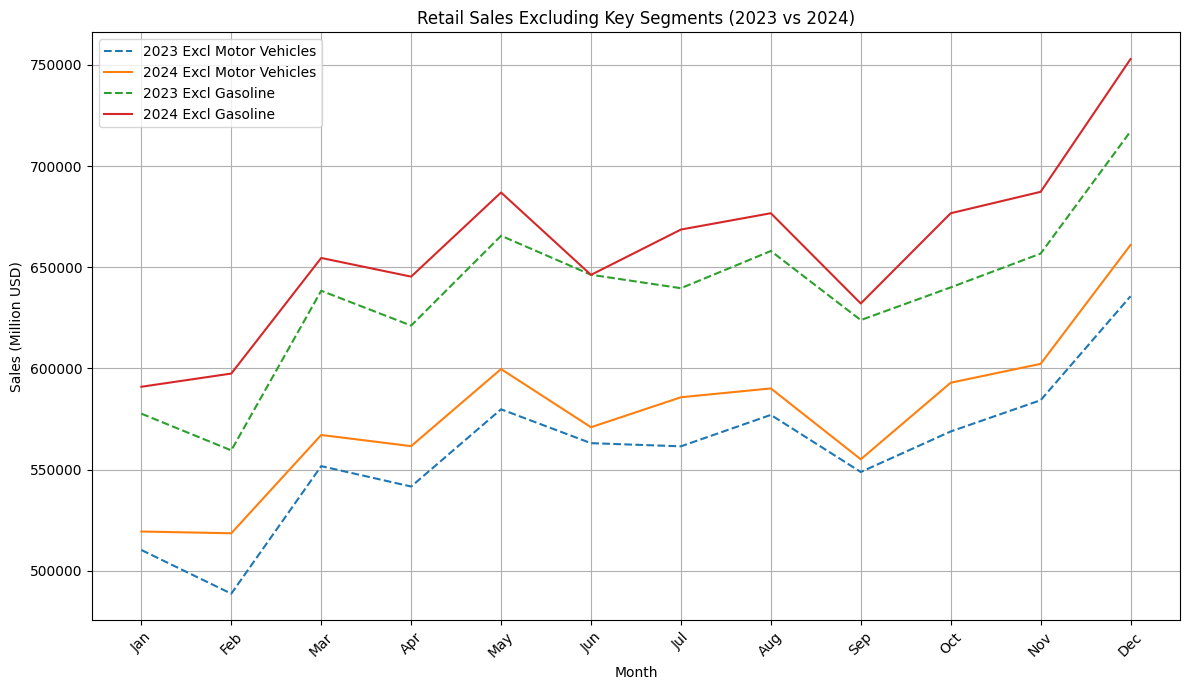

In [51]:
plt.figure(figsize=(12,7))
plt.plot(comparison_df["Month"],comparison_df["2023_Excl_MV"],label="2023 Excl Motor Vehicles",linestyle='--')
plt.plot(comparison_df["Month"],comparison_df["2024_Excl_MV"],label="2024 Excl Motor Vehicles")
plt.plot(comparison_df["Month"],comparison_df["2023_Excl_Gas"],label="2023 Excl Gasoline",linestyle='--')
plt.plot(comparison_df["Month"],comparison_df["2024_Excl_Gas"],label="2024 Excl Gasoline")
plt.title("Retail Sales Excluding Key Segments (2023 vs 2024)")
plt.xlabel("Month")
plt.ylabel("Sales (Million USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Interpretation of Year-over-Year Changes

This plot shows the percentage change in retail sales from 2023 to 2024 across key segments:

- **Strong Start**:January to March saw robust year-over-year growth,especially in total and core retail sectors.
- **Mid-Year Stabilization**:Growth moderated between May and August, though remained positive,indicating steady consumer spending.
- **Resilience Across Segments**:Even when motor vehicles or gasoline are excluded,the upward trend suggests strong underlying demand.

This type of analysis is useful for identifying cyclical patterns and planning inventory or marketing strategies accordingly.


### Prepare comparison data for 2023 vs 2024 across key sub-industries

In [52]:
categories={
    "Total":1,
    "Excl Motor Vehicles":2,
    "Excl Gasoline":3,
    "Excl Motor Vehicles & Gasoline":4}

comparison_df=pd.DataFrame({
    "Month":months,
    "2023_Total":df_2023.iloc[categories["Total"],2:14].astype(float).values,
    "2024_Total":df_2024.iloc[categories["Total"],2:14].astype(float).values,
    "2023_Excl_MV":df_2023.iloc[categories["Excl Motor Vehicles"],2:14].astype(float).values,
    "2024_Excl_MV":df_2024.iloc[categories["Excl Motor Vehicles"],2:14].astype(float).values,
    "2023_Excl_Gas":df_2023.iloc[categories["Excl Gasoline"],2:14].astype(float).values,
    "2024_Excl_Gas":df_2024.iloc[categories["Excl Gasoline"],2:14].astype(float).values,})

### Year-over-Year Percentage Change in Retail Sales for Key Categories
### Calculate percentage change

In [53]:
percentage_change_df=pd.DataFrame({
    "Month":months,
    "Total YoY %":(comparison_df["2024_Total"]-comparison_df["2023_Total"])/comparison_df["2023_Total"]*100,
    "Excl MV YoY %":(comparison_df["2024_Excl_MV"]-comparison_df["2023_Excl_MV"])/comparison_df["2023_Excl_MV"]*100,
    "Excl Gas YoY %":(comparison_df["2024_Excl_Gas"]-comparison_df["2023_Excl_Gas"])/comparison_df["2023_Excl_Gas"]*100,})

### Plot the percentage change

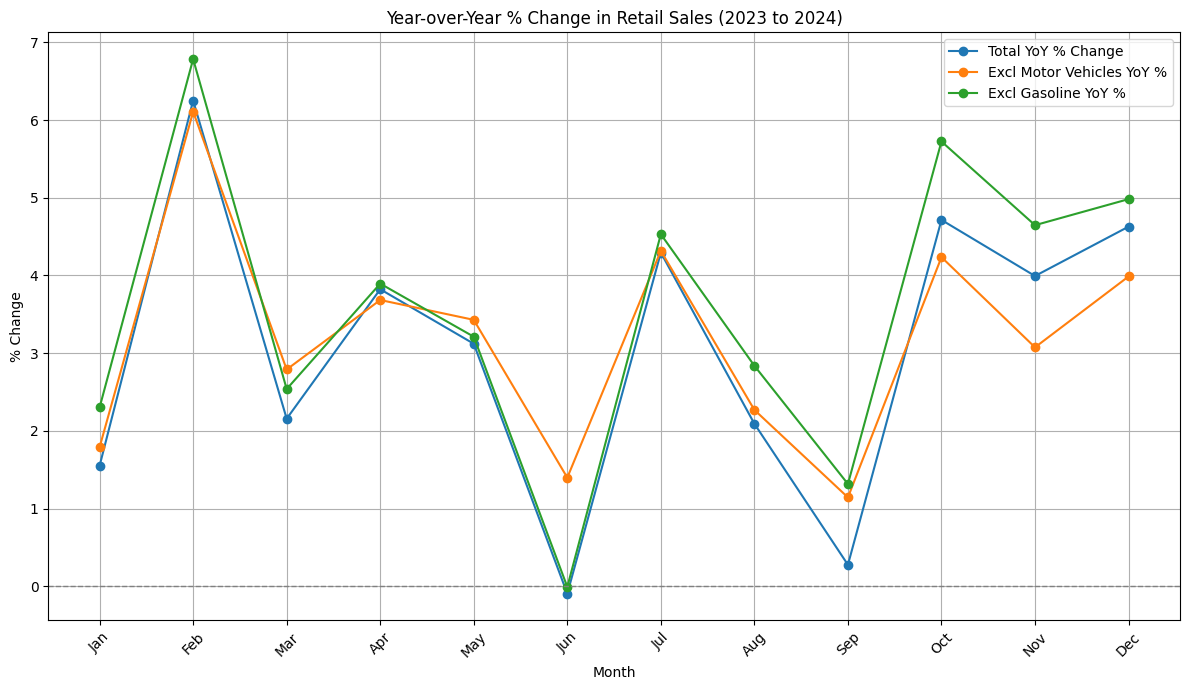

In [54]:
plt.figure(figsize=(12,7))
plt.plot(percentage_change_df["Month"],percentage_change_df["Total YoY %"],label="Total YoY % Change",marker='o')
plt.plot(percentage_change_df["Month"],percentage_change_df["Excl MV YoY %"],label="Excl Motor Vehicles YoY %",marker='o')
plt.plot(percentage_change_df["Month"],percentage_change_df["Excl Gas YoY %"],label="Excl Gasoline YoY %",marker='o')
plt.axhline(0,color='gray',linestyle='--',linewidth=1)
plt.title("Year-over-Year % Change in Retail Sales (2023 to 2024)")
plt.xlabel("Month")
plt.ylabel("% Change")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Forecast for 2025:Total Monthly Retail Sales

The 2025 forecast is based on patterns from 2023 and 2024.The model shows:

- **Steady Growth**:Sales could reach over 800,000 million USD by December.
- **Seasonal Peaks**:March–May and November–December will likely be the busiest periods.
- **Upward Trend**:Growth is expected to continue,with minor ups and downs.

  **Forecast Highlights**:
- January 2025: **661,299**
- July 2025: **739,606**
- December 2025: **807,900**


### Forecasting Total Retail Sales for 2025 using Exponential Smoothing

In [55]:
from statsmodels.tsa.api import ExponentialSmoothing

### Combine 2023 and 2024 monthly total sales

In [56]:
combined_sales=pd.concat([
    pd.Series(comparison_df["2023_Total"].values,index=pd.date_range("2023-01-01",periods=12,freq='MS')),
    pd.Series(comparison_df["2024_Total"].values,index=pd.date_range("2024-01-01",periods=12,freq='MS'))])

### Fit Exponential Smoothing model

In [57]:
model=ExponentialSmoothing(combined_sales,trend="add",seasonal="add",seasonal_periods=12)
fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Forecast for 12 months of 2025

In [58]:
forecast_2025=fit.forecast(12)

### Plot actual and forecasted values

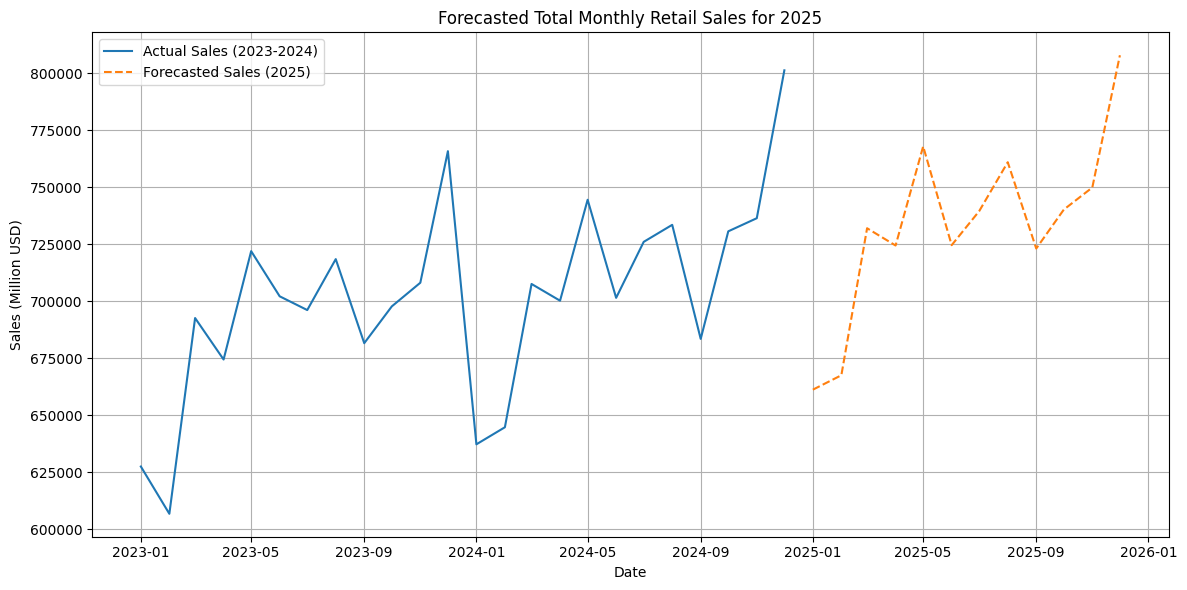

In [59]:
plt.figure(figsize=(12,6))
plt.plot(combined_sales,label="Actual Sales (2023-2024)")
plt.plot(forecast_2025,label="Forecasted Sales (2025)",linestyle='--')
plt.title("Forecasted Total Monthly Retail Sales for 2025")
plt.xlabel("Date")
plt.ylabel("Sales (Million USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Display forecast

In [60]:
forecast_2025

,0
2025-01-01,661298.657691
2025-02-01,667617.438071
2025-03-01,732066.022395
2025-04-01,724494.702044
2025-05-01,767964.191293
2025-06-01,724649.930255
2025-07-01,739606.153380
2025-08-01,761015.839695
2025-09-01,723174.720718
2025-10-01,740247.321332



## Insights and Explanations

This section shares the most important takeaways from the data.

### Key Insights:

1. **Retail Sales Grew in 2024**  
   Monthly sales were higher in 2024 than in 2023.This shows stronger demand or higher prices.

2. **Core Segments Showed Strength**  
   Sales remained strong even without motor vehicles and gasoline.This suggests growth in essential retail categories.

3. **Seasonal Trends Were Clear**  
   Sales peaked in March to May and again in November and December.These are typical shopping seasons in the U.S.

4. **2025 Outlook Is Positive**  
   The forecast for 2025 shows continued growth.This gives retailers useful guidance for planning.

These insights can help businesses make better choices using real data.



## Conclusion

This project analyzed U.S. retail and food services sales from 2023 and 2024.The results show steady seasonal trends and consistent yearly growth.Key insights include:

- 2024 experienced higher sales than 2023 in nearly every month,indicating stronger consumer demand or inflation-adjusted spending.
- Excluding volatile categories such as motor vehicles and gasoline,core retail sales still showed upward trends, reflecting stable economic activity.
- Forecasting for 2025 using exponential smoothing predicts continued growth,with notable peaks in mid-year and holiday seasons.

These patterns reflect a healthy retail sector.They also offer useful guidance for future planning and decision-making.



## Recommendations

Based on what I‘ve learned,here are five steps retail teams can take to improve decisions and results.

1. **Plan Inventory Around Peaks**  
   Stock up before sales spikes in March–May and October–December.Use past data to prepare in advance.

2. **Promote During Slow Months**  
   Offer deals in slower months like June or September.This helps keep sales more balanced year-round.

3. **Focus on Strong Categories**  
   Invest in products that showed steady growth. Essentials like food,clothing,and household goods performed best.

4. **Use Forecasts to Make Decisions**  
   Let the forecast guide key choices in staffing,ordering, and budgeting.Predictive tools reduce guesswork.

5. **Watch Trends and Adjust**  
   Keep tracking what’s selling well.Be ready to shift focus when customer habits change.



## Additional Elements Supporting the Analysis

The analysis includes more than just charts. Here are the steps taken to make the findings clear and useful:

### Data Cleaning  
- Removed empty rows and columns.
- Renamed and organized columns.
- Made sure dates and values were consistent.

### Visualizations  
- Used clear labels and colors.
- Compared trends between years.
- Highlighted seasonal and yearly changes.

### Forecasting  
- Used a time series model to predict 2025 sales.
- Forecast followed real trends from the past two years.

This structure helps to quickly understand the key messages.
